<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Computação em Nuvem III
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>AWS EC2;</li>
  <li>AWS SageMaker;</li>
  <li>AWS Acesso Externo.</li>
</ol>

---

# **Exercícios**

## 1\. AWS SageMaker

Replique as atividades do item 2.3 em sua conta.

In [ ]:
%%writefile cotacao.csv
date,usd,eur,gbp
2021-01-21,5.4582,6.1896,7.3980
2021-01-20,5.4191,6.1290,7.3673
2021-01-19,5.4383,6.1676,7.3994
2021-01-18,5.5666,6.3042,7.5672


Writing cotacao.csv


- Criei o bucket no S3: modulo39-ebac-cinthia-sagemaker

- fiz upload do arquivo cotacao.csv

- abri o sagemaker e iniciei um notebook com o mesmo nome do bucket com instancia ml.t2.medium e Amazon Linux 2, Jupyter Lab 1(notebook-al2-v1)

- clicar na instancia criada e abrir o jupyter lab

- escolher o conda python3

    !python -V

    import boto3
    import pandas as pd

    BUCKET = 'modulo39-ebac-cinthia-sagemaker'

    df = pd.read_csv(f's3://{BUCKET}/cotacao.csv')
    df.head()

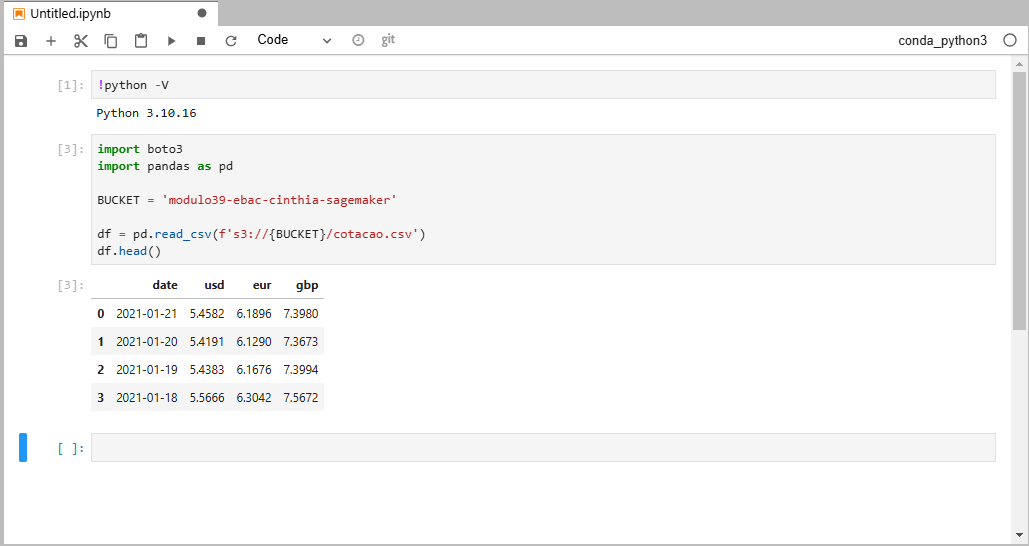

Para parar devemos ir em file -> shut down

Selecionar a instancia -> ações -> parar

## 2\. AWS Acesso Externo

Replique as atividades do item 3.1 em sua conta.


- Criar usuário no IAM com o nome: modulo39-ebac-cinthia-sagemaker

- ir em anexar políticas existentes de forma direta e selecionar o: AmazonS3ReadOnlyAccess que permite somente leitura

- criar chave de acesso de nome: id_chave_modulo39 | chave de acesso: *** | chave de acesso secreta: ***

 - Instalar o `boto3`

In [ ]:
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 5.4 MB/s eta 0:00:00


- Configurar as credenciais

In [ ]:
from getpass import getpass #aqui é a chave de acesso

aws_access_key_id = getpass()

··········


In [ ]:
from getpass import getpass #aqui é a chave de acesso secreta

aws_secret_access_key = getpass()

··········


In [ ]:
import boto3
import pandas as pd

client = boto3.client('s3', aws_access_key_id=aws_access_key_id, aws_secret_access_key=aws_secret_access_key)

In [ ]:
BUCKET = 'modulo39-ebac-cinthia-sagemaker'

client.download_file(BUCKET, 'cotacao.csv', 'cotacao_aws.csv')

 - Extrair

In [ ]:
df = pd.read_csv('cotacao_aws.csv')
df.head()

,date,usd,eur,gbp
0,2021-01-21,5.4582,6.1896,7.3980
1,2021-01-20,5.4191,6.1290,7.3673
2,2021-01-19,5.4383,6.1676,7.3994
3,2021-01-18,5.5666,6.3042,7.5672


 - Carregar

In [ ]:
client.upload_file(Filename='cotacao_aws.csv', Bucket=BUCKET, Key='cotacao_aws.csv')

#não demos permissão de escrita, somente de leitura e por isso a operação falha

S3UploadFailedError: Failed to upload cotacao_aws.csv to modulo39-ebac-cinthia-sagemaker/cotacao_aws.csv: An error occurred (AccessDenied) when calling the PutObject operation: User: arn:aws:iam::682033465800:user/modulo39-ebac-cinthia-sagemaker is not authorized to perform: s3:PutObject on resource: "arn:aws:s3:::modulo39-ebac-cinthia-sagemaker/cotacao_aws.csv" because no identity-based policy allows the s3:PutObject action